In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.simplefilter('ignore')

In [127]:
acushnet = pd.read_csv('골프/골프_acushnetholdingscorp.csv')
calaway = pd.read_csv('골프/골프_callawaygolfcomp.csv')
castelbajac = pd.read_csv('골프/골프_castelbajac.csv')
creasf = pd.read_csv('골프/골프_creasf&ccoltd.csv')
fila = pd.read_csv('골프/골프_filaholdings.csv')

train = [acushnet, calaway, castelbajac, creasf, fila]

In [128]:
test_acushnet = pd.read_csv('test_골프/test_골프_acushnet holdings corp.csv')
test_calaway = pd.read_csv('test_골프/test_골프_callaway golf comp.csv')
test_castelbajac = pd.read_csv('test_골프/test_골프_castelbajac.csv')
test_creasf = pd.read_csv('test_골프/test_골프_creas f&c co ltd.csv')
test_fila = pd.read_csv('test_골프/test_골프_fila holdings.csv')

test = [test_acushnet, test_calaway, test_castelbajac, test_creasf, test_fila]

In [129]:
corp_names = ['acushnet', 'calaway', 'castelbajac', 'creasf', 'fila']

i = 0;

for corp in train:
    corp['name'] = corp_names[i]
    i = i + 1



i = 0

for corp in test:
    corp['name'] = corp_names[i]
    i = i + 1

In [130]:
df1 = pd.concat(train)
df2 = pd.concat(test)

df = pd.concat([df1,df2])

In [131]:
df = df.set_index('name')

In [132]:
df = df[['Date', 'Price']]

In [133]:
df = df.reset_index()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    276 non-null    object
 1   Date    276 non-null    object
 2   Price   276 non-null    object
dtypes: object(3)
memory usage: 6.6+ KB


In [135]:
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace('.', '')
df['Price'] = df['Price'].str.replace(',', '')

In [136]:
df['Date'] = pd.to_datetime(df['Date'])

In [137]:
df['Price'] = df['Price'].astype(int)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    276 non-null    object        
 1   Date    276 non-null    datetime64[ns]
 2   Price   276 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 5.5+ KB


In [139]:
df = df.set_index('name')

In [140]:
def scaler(col):
    return (col - col.min()) / (col.max() - col.min()) + 1

for corp in corp_names:
    df.loc[corp, 'Price'] = scaler(df.loc[corp]['Price'])

In [141]:
df = df.sort_values(by=['name','Date'])

In [142]:
df.head(10)

,Date,Price
name,,
acushnet,2017-09-01,1.292230
acushnet,2017-10-01,1.305953
acushnet,2017-11-01,1.333011
acushnet,2017-12-01,1.356397
acushnet,2018-01-01,1.363549
acushnet,2018-02-01,1.358523
acushnet,2018-03-01,1.395245
acushnet,2018-04-01,1.415926
acushnet,2018-05-01,1.411094


In [143]:
# !pip install arch

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)
from arch import arch_model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [145]:
df = df.reset_index()

In [146]:
df = df.set_index('Date')

In [153]:
data = df[df['name'] == corp_names[1]]['Price']

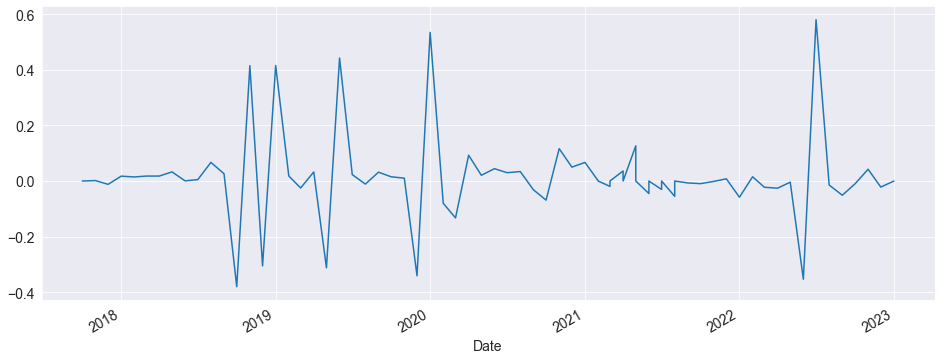

In [154]:
crd_inflation = (100 * data).pct_change().dropna()
fig = crd_inflation.plot()

In [159]:
# !pip install pmdarima

In [171]:
from sklearn.model_selection import train_test_split

In [175]:
train, test = train_test_split(data, shuffle=False)

In [198]:
import pmdarima as pmd
pmd_mdl = pmd.auto_arima(train, stationary = True)
pmd_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  21.826
Date:                Wed, 04 Jan 2023   AIC                            -35.653
Time:                        15:53:49   BIC                            -27.697
Sample:                             0   HQIC                           -32.584
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0634      0.168      0.378      0.705      -0.265       0.392
ar.L1          0.9592      0.108      8.848      0.000       0.747       1.172
ma.L1         -0.6382      0.201     -3.177      0.001      -1.032      -0.244
sigma2         0.0255      0.006      4.515      0.000       0.014       0.037
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                69.09
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -1.93
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

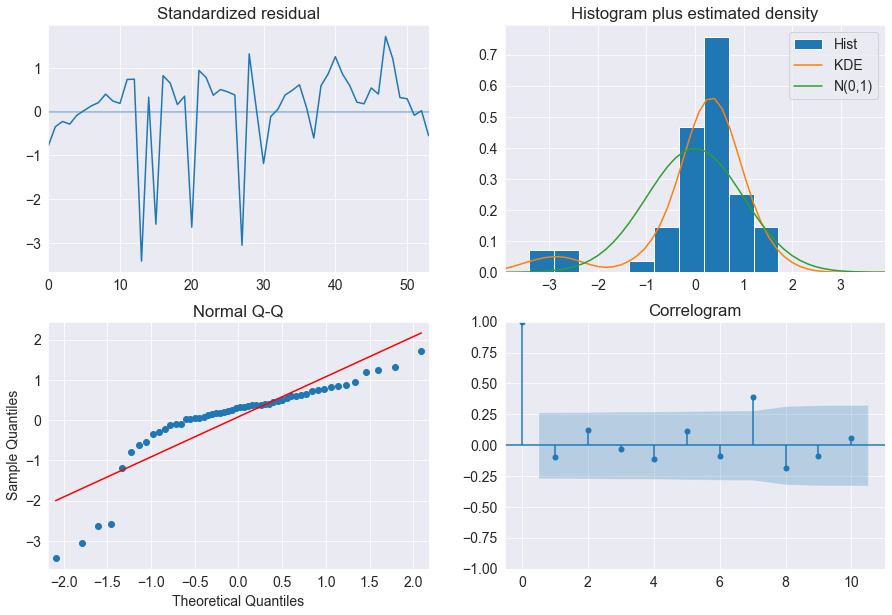

In [200]:
pmd_mdl.plot_diagnostics(figsize = (15, 10))
plt.show()

In [203]:
arima_resid = pmd_mdl.arima_res_.resid

In [204]:
from statsmodels.stats.diagnostic import het_arch

arima_resid = pmd_mdl.arima_res_.resid

LM_pvalue = het_arch(arima_resid, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

# H0 arch effect not exist

LM-test-Pvalue: 0.30157


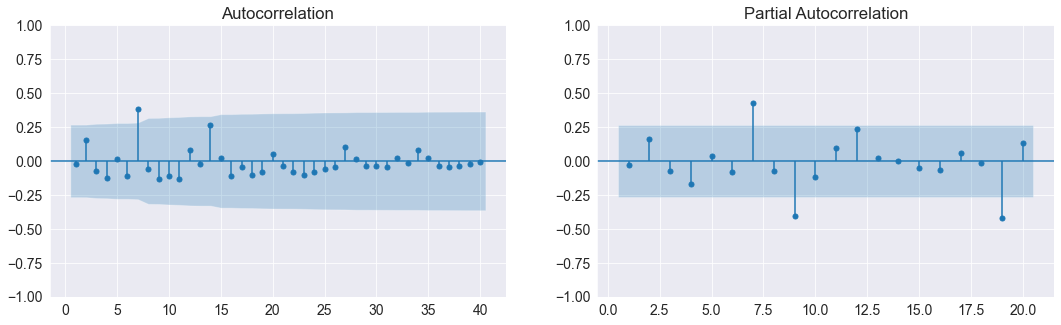

In [206]:
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(1, 2, figsize = (18,5))
sgt.plot_acf(arima_resid**2, zero = False, lags = 40, ax=ax[0])
sgt.plot_pacf(arima_resid**2, zero = False, lags = 20, ax=ax[1])
plt.show()

In [208]:
from arch import arch_model

mdl_garch = arch_model(arima_resid, vol = 'GARCH', p = 1, q = 1)
garch_fit = mdl_garch.fit()
garch_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 153.2143342938348
Iteration:      2,   Func. Count:     15,   Neg. LLF: 84155978.93275684
Iteration:      3,   Func. Count:     23,   Neg. LLF: -22.151650758374203
Iteration:      4,   Func. Count:     28,   Neg. LLF: -22.152483955496987
Iteration:      5,   Func. Count:     33,   Neg. LLF: -22.15307134409289
Iteration:      6,   Func. Count:     38,   Neg. LLF: -22.15319983838755
Iteration:      7,   Func. Count:     43,   Neg. LLF: -22.15325371295751
Iteration:      8,   Func. Count:     48,   Neg. LLF: -22.153262373010175
Iteration:      9,   Func. Count:     53,   Neg. LLF: -22.15326414825505
Iteration:     10,   Func. Count:     57,   Neg. LLF: -22.15326414825363
Optimization terminated successfully    (Exit mode 0)
            Current function value: -22.15326414825505
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                22.1533
Distribution:                  Normal   AIC:                          -36.3065
Method:            Maximum Likelihood   BIC:                          -28.3506
                                        No. Observations:                   54
Date:                Wed, Jan 04 2023   Df Residuals:                       53
Time:                        16:08:22   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0124  2.235e-02      0.554      0.580 [-3.144e-02,5.619e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0198  1.813e-02      1.090      0.276 [-1.577e-02,5.530e-02]
alpha[1]       0.0000  2.821e-03      0.000      1.000 [-5.529e-03,5.529e-03]
beta[1]        0.2319      0.662      0.350      0.726      [ -1.066,  1.530]
=============================================================================

Covariance estimator: robust
"""

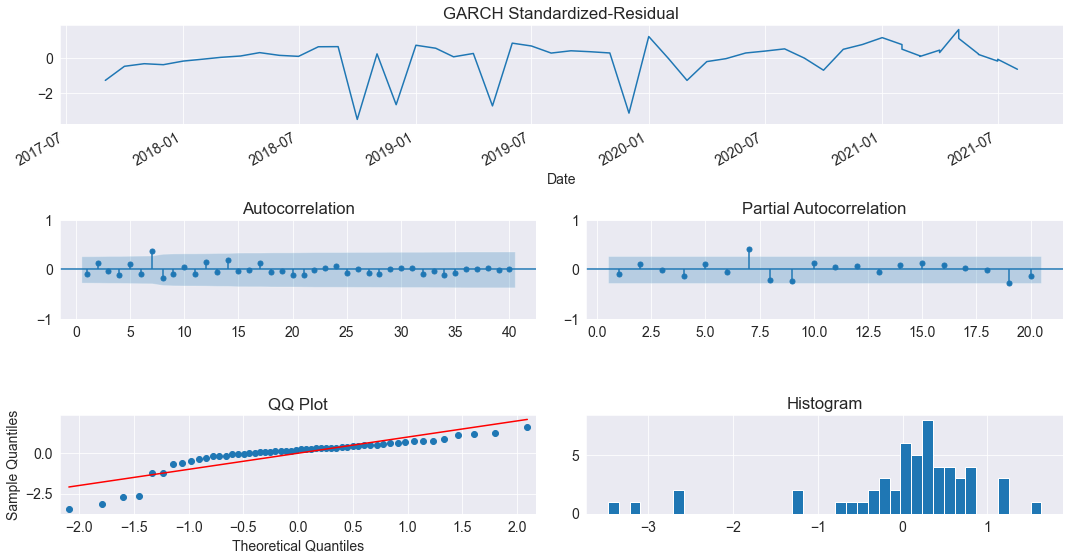

In [210]:
import statsmodels.api as sm

garch_std_resid = pd.Series(garch_fit.resid / garch_fit.conditional_volatility)
fig = plt.figure(figsize = (15, 8))

# Residual
garch_std_resid.plot(ax = fig.add_subplot(3,1,1), title = 'GARCH Standardized-Residual', legend = False)

# ACF/PACF
sgt.plot_acf(garch_std_resid, zero = False, lags = 40, ax=fig.add_subplot(3,2,3))
sgt.plot_pacf(garch_std_resid, zero = False, lags = 20, ax=fig.add_subplot(3,2,4))

# QQ-Plot & Norm-Dist
sm.qqplot(garch_std_resid, line='s', ax=fig.add_subplot(3,2,5)) 
plt.title("QQ Plot")
fig.add_subplot(3,2,6).hist(garch_std_resid, bins = 40)
plt.title("Histogram")

plt.tight_layout()
plt.show()

In [212]:
from statsmodels.stats.diagnostic import acorr_ljungbox

white_noise_garch = acorr_ljungbox(garch_std_resid, lags = [10], return_df=True)
white_noise_garch

# H0 error is white noise

,lb_stat,lb_pvalue
10,15.565345,0.112769


In [213]:
mdl_ga

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x188c72e8dc8